In [93]:
#Loading the data set
import pandas as pd
df = pd.read_csv("G:\ExcelR\Data Science Assignments\Assignment 16\KNN\\Zoo.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [94]:
#Missing VAlue Checking
missing_values = df.isnull().sum()
print ("Missing Values are:",missing_values)
print("Summary", df.describe())

Missing Values are: animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64
Summary              hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max  

In [95]:
#LabelEncoding 0-1
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder() #Encodes values to 1 & 0
df["animal name"] = LE.fit_transform(df["animal name"])

In [96]:
#decalring X and Y Variables
Y = df['animal name']
X = df.iloc[:,1:17]

In [97]:
X_cont = df.iloc[:,1:18]
X_cont.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [98]:
#Standardization 
from sklearn.preprocessing import StandardScaler
SS = StandardScaler() #Standardization 
SS_X = SS.fit_transform(X_cont)
SS_X = pd.DataFrame(SS_X)
d1 = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']
SS_X.columns = d1
SS_X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,0.558396
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451


In [99]:
Y = df["animal name"]
X = df.iloc[:,2:]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

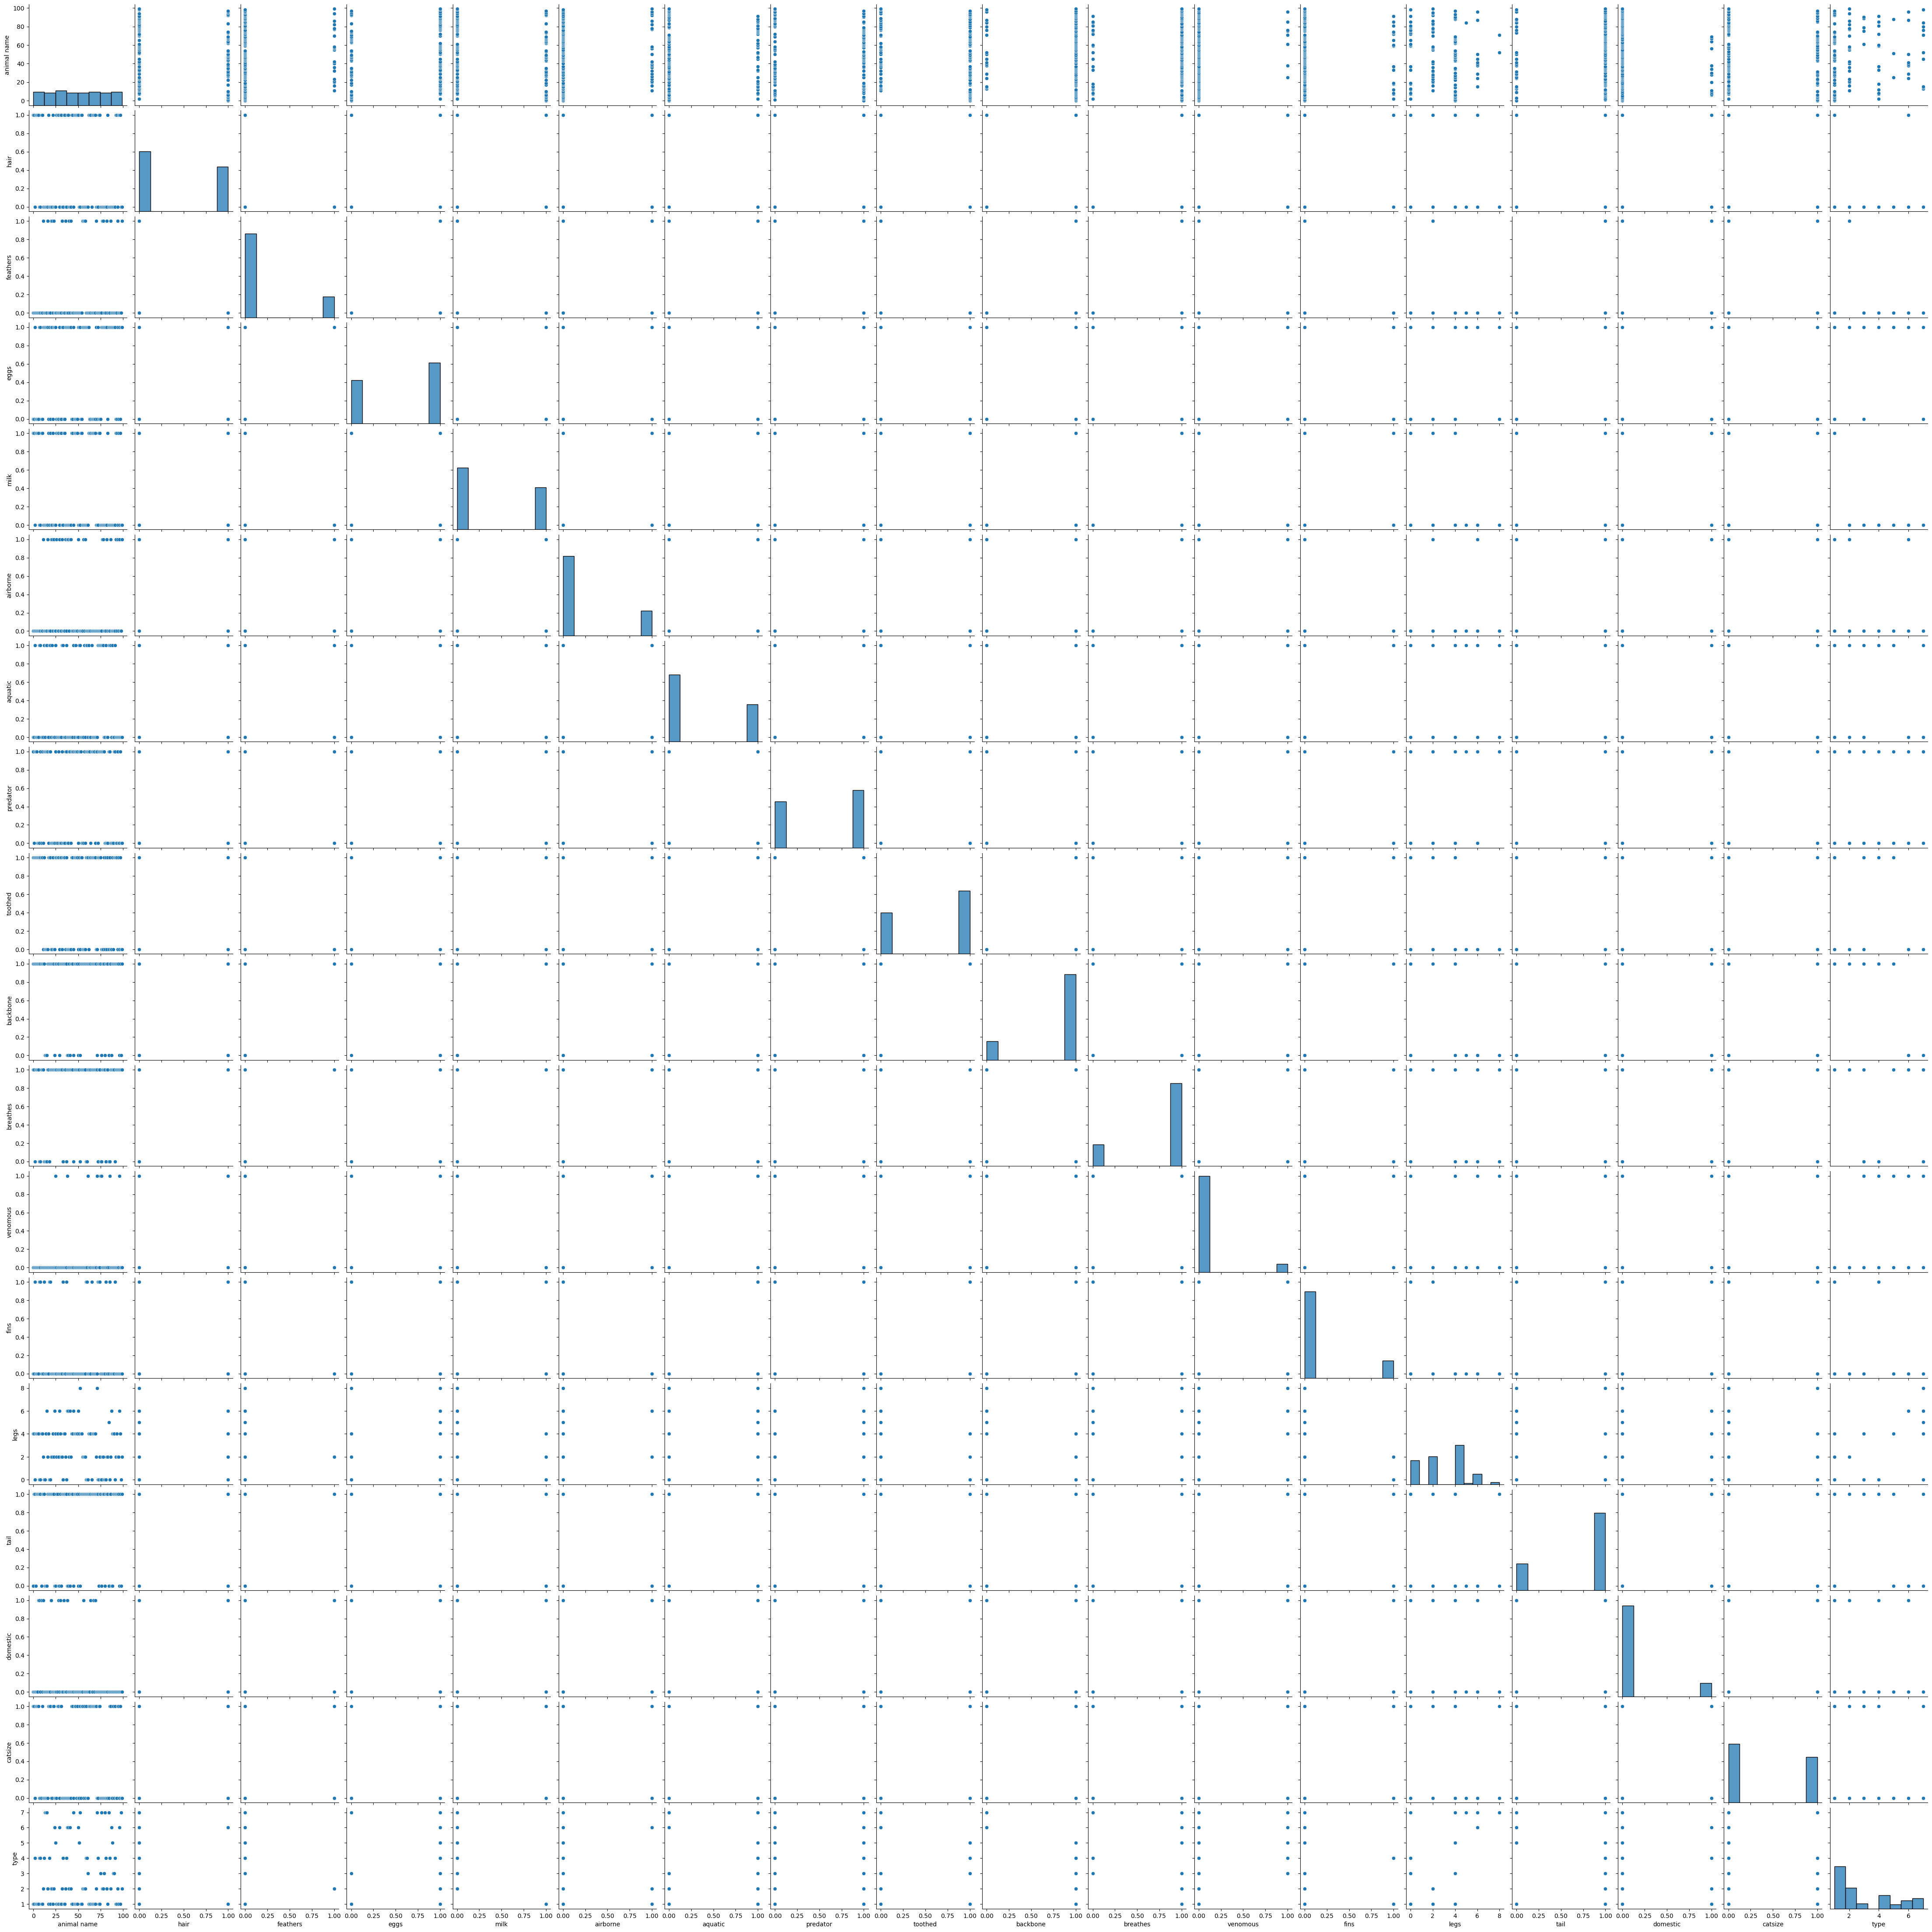

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

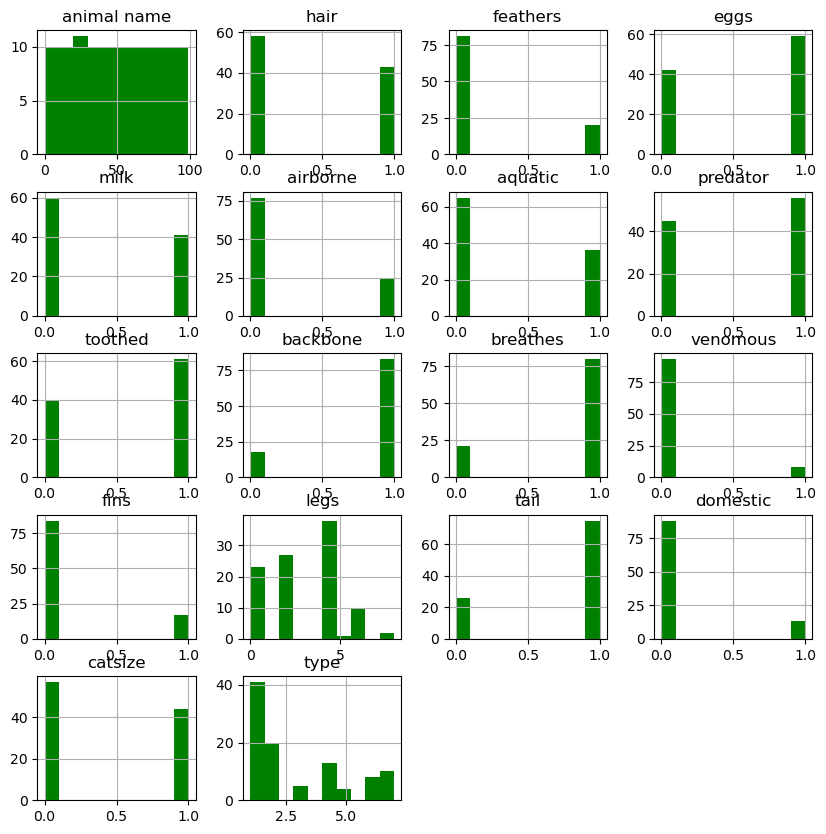

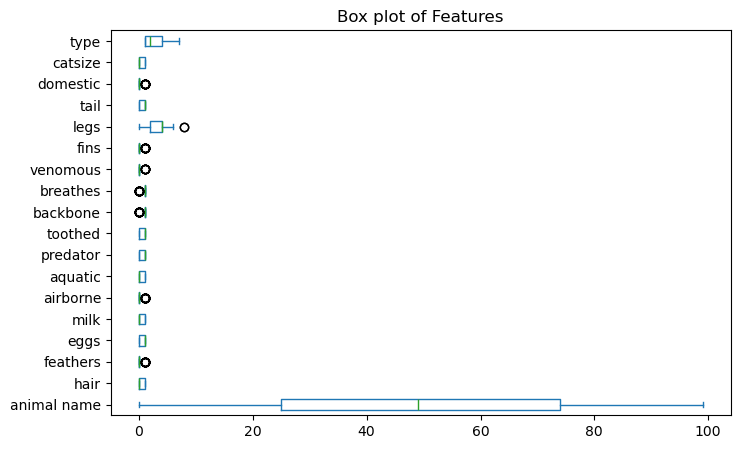

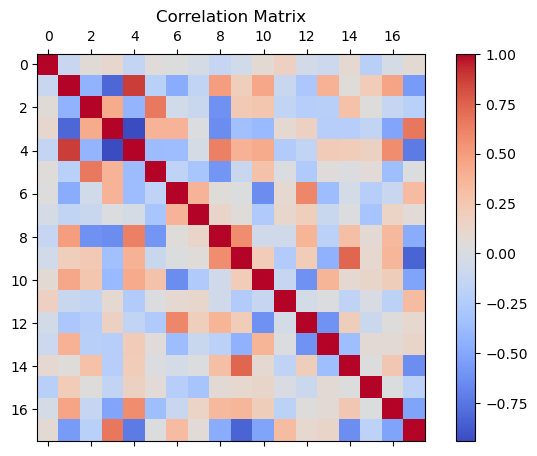

In [101]:
feature_columns = df.columns[:18] # Assuming the last column as target variable
df[feature_columns].hist(figsize = (10,10), color = 'green')
plt.title("Histograms of Features")
plt.show()

# Box plot for each feature
df[feature_columns].plot(kind='box', vert=False, figsize=(8, 5)) #length,Height 
plt.title('Box plot of Features')
plt.show()

# 3. Investigate correlations between features
correlation_matrix = df.corr()
plt.figure(figsize=(8, 5)) #length,Height 
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

In [102]:
#Splitting data set nto X and Y
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [103]:
# Apply the k nearest neighbourhood classifier for training sample
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
training_accuracy = knn.score(X_train,Y_train)
test_accuracy = knn.score(X_test,Y_test)

print("Training Accuracy:",training_accuracy.round(3))
print("Testing Accuracy:",test_aaccuracy.round(3))

Training Accuracy: 0.438
Testing Accuracy: 0.0


In [104]:
# cross validation
training_accuracy = []
test_accuracy = []

# Create a KNeighborsClassifier object
import numpy as np
knn = KNeighborsClassifier(n_neighbors=2)
from sklearn.metrics import accuracy_score


for i in range(1,200,1):
    X_train,X_test,Y_train,Y_test   = train_test_split(X,Y,test_size=0.30,random_state=i)
    knn.fit(X_train,Y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,y_pred_test))

print("Crossvalidation: Training accuracy",np.mean(training_accuracy).round(3))
print("Crossvalidation: Test accuracy",np.mean(test_accuracy).round(3))

Crossvalidation: Training accuracy 0.413
Crossvalidation: Test accuracy 0.013


In [105]:
# prompt: apply the same method of cross validation as above for all k values such as 5,7,9,11,13,15,17 but we need for each k value average accuracies should be separated

training_accuracy_list = []
test_accuracy_list = []

for k in range(5, 18, 2):
    training_accuracy = []
    test_accuracy = []

    for i in range(1, 200, 1):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, Y_train)
        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)
        training_accuracy.append(accuracy_score(Y_train, y_pred_train))
        test_accuracy.append(accuracy_score(Y_test, y_pred_test))

    training_accuracy_list.append(np.mean(training_accuracy).round(2))
    test_accuracy_list.append(np.mean(test_accuracy).round(2))

print("Training Accuracies:", training_accuracy_list)
print("Test Accuracies:", test_accuracy_list)


Training Accuracies: [0.19, 0.15, 0.11, 0.09, 0.08, 0.07, 0.07]
Test Accuracies: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


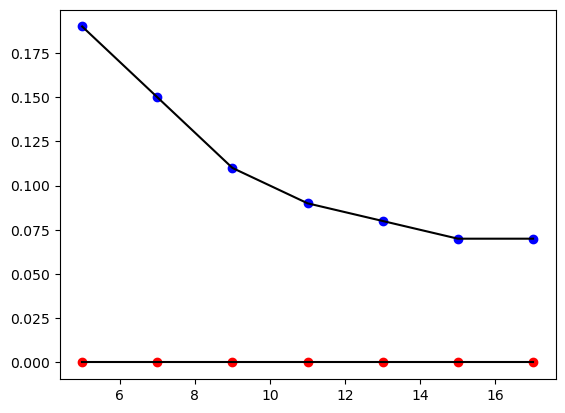

In [106]:
import matplotlib.pyplot as plt
plt.scatter(range(5, 18, 2),training_accuracy_list,color='blue')
plt.plot(range(5, 18, 2),training_accuracy_list,color='black')
plt.scatter(range(5, 18, 2),test_accuracy_list,color='red')
plt.plot(range(5, 18, 2),test_accuracy_list,color='black')
plt.show()      

In [ ]:
# Interview Questions:
'''1.What are the key hyperparameters in KNN?
Ans)  The most important hyperparameter for KNN is the number of neighbors (n_neighbors).
Also hyperparameters include the number of nodes and layers in a neural network and the number of branches in a decision tree. 
Hyperparameters determine key features such as model architecture, learning rate, and model complexity.


2.What distance metrics can be used in KNN?
Ans) Minkowski, Euclidean, Manhattan, Chebyshev, Cosine, Jaccard, and Hamming distance were applied on kNN classifiers for different k values. 
It is observed that Cosine distance works better than the other distance metrics on star categorization.'''